In [1]:
import pandas as pd
import tabloo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('concatenated.csv')

/home/rohan/.cache/pypoetry/virtualenvs/accountable-Eqeragbq-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Unnamed: 0,commune,date_scraped,prix,surface_habitable,url,immoweb_commune,gadm_commune,province,code_postal,generated,valid?,NL_commune,FR_commune,DE_commune,mois,prix_par_mc
0,0,aalter/9880,2017-08-15,749000.0,250.0,http://www.immoweb.be/fr/annonce/villa/a-vendr...,aalter/9880,Aalter,Oost-Vlaanderen,9880.0,aalter/9880,True,NaN,NaN,NaN,2017-08,2996.000000
1,1,aalter/9880,2017-08-15,215000.0,111.0,http://www.immoweb.be/fr/annonce/maison/a-vend...,aalter/9880,Aalter,Oost-Vlaanderen,9880.0,aalter/9880,True,NaN,NaN,NaN,2017-08,1936.936937
2,2,aalter/9880,2017-08-15,219000.0,164.0,http://www.immoweb.be/fr/annonce/maison/a-vend...,aalter/9880,Aalter,Oost-Vlaanderen,9880.0,aalter/9880,True,NaN,NaN,NaN,2017-08,1335.365854
3,3,aalter/9880,2017-08-15,599000.0,378.0,http://www.immoweb.be/fr/annonce/villa/a-vendr...,aalter/9880,Aalter,Oost-Vlaanderen,9880.0,aalter/9880,True,NaN,NaN,NaN,2017-08,1584.656085
4,4,aalter/9880,2017-08-15,345000.0,210.0,http://www.immoweb.be/fr/annonce/maison/a-vend...,aalter/9880,Aalter,Oost-Vlaanderen,9880.0,aalter/9880,True,NaN,NaN,NaN,2017-08,1642.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614362,614362,écaussinnes/7190,2020-12-01,249500.0,180.0,https://www.immoweb.be/fr/annonce/maison/a-ven...,écaussinnes/7190,Écaussinnes,Hainaut,7190.0,écaussinnes/7190,True,NaN,NaN,NaN,2020-12,1386.111111
614363,614363,écaussinnes/7190,2020-12-01,495000.0,294.0,https://www.immoweb.be/fr/annonce/maison/a-ven...,écaussinnes/7190,Écaussinnes,Hainaut,7190.0,écaussinnes/7190,True,NaN,NaN,NaN,2020-12,1683.673469
614364,614364,écaussinnes/7190,2020-12-01,325000.0,160.0,https://www.immoweb.be/fr/annonce/maison/a-ven...,écaussinnes/7190,Écaussinnes,Hainaut,7190.0,écaussinnes/7190,True,NaN,NaN,NaN,2020-12,2031.250000
614365,614365,écaussinnes/7190,2020-12-01,280000.0,170.0,https://www.immoweb.be/fr/annonce/maison/a-ven...,écaussinnes/7190,Écaussinnes,Hainaut,7190.0,écaussinnes/7190,True,NaN,NaN,NaN,2020-12,1647.058824


In [4]:
for column in df.columns:
    print(column, df[column][df[column].isnull().values].shape)

Unnamed: 0 (0,)
commune (0,)
date_scraped (305,)
prix (0,)
surface_habitable (0,)
url (2900,)
immoweb_commune (237762,)
gadm_commune (237762,)
province (237762,)
code_postal (237762,)
generated (237762,)
valid? (237762,)
NL_commune (613970,)
FR_commune (613787,)
DE_commune (614184,)
mois (305,)
prix_par_mc (0,)


In [5]:
df[['date_scraped','mois']]

,date_scraped,mois
0,2017-08-15,2017-08
1,2017-08-15,2017-08
2,2017-08-15,2017-08
3,2017-08-15,2017-08
4,2017-08-15,2017-08
...,...,...
614362,2020-12-01,2020-12
614363,2020-12-01,2020-12
614364,2020-12-01,2020-12
614365,2020-12-01,2020-12


In [6]:
df['commune'].unique()

array(['aalter/9880', 'aarschot/3200', 'aartselaar/2630', 'affligem/1790',
       'aiseau-presles/6250', 'alken/3570', 'alost/9300',
       'alveringem/8690', 'amay/4540', 'ambleve/4770', 'andenne/5300',
       'anderlecht/1070', 'anderlues/6150', 'anhee/5537', 'ans/4430',
       'anthisnes/4160', 'antoing/7640', 'anvers-1/2018', 'anvers-2/2020',
       'anvers/2000', 'anvers-3/2030', 'anvers-4/2040', 'anvers-5/2050',
       'anvers-6/2060', 'anzegem/8570', 'ardooie/8850', 'arendonk/2370',
       'arlon/6700', 'as/3665', 'asse/1730', 'assenede/9960',
       'assesse/5330', 'ath/7800', 'attert/6717', 'aubange/6790',
       'aubel/4880', 'auderghem/1160', 'avelgem/8580', 'averbode/3271',
       'awans/4340', 'aywaille/4920', 'baarle-hertog/2387', 'baelen/4837',
       'balen/2490', 'bastogne/6600', 'beaumont/6500', 'beauraing/5570',
       'beauvechain/1320', 'beernem/8730', 'beerse/2340', 'beersel/1650',
       'begijnendijk/3130', 'bekkevoort/3460', 'beloeil/7972',
       'berchem-sain

In [7]:
df[['commune_str','postal_code']] = df['commune'].str.split('/',expand=True)

In [8]:
df

,Unnamed: 0,commune,date_scraped,prix,surface_habitable,url,immoweb_commune,gadm_commune,province,code_postal,generated,valid?,NL_commune,FR_commune,DE_commune,mois,prix_par_mc,commune_str,postal_code
0,0,aalter/9880,2017-08-15,749000.0,250.0,http://www.immoweb.be/fr/annonce/villa/a-vendr...,aalter/9880,Aalter,Oost-Vlaanderen,9880.0,aalter/9880,True,NaN,NaN,NaN,2017-08,2996.000000,aalter,9880
1,1,aalter/9880,2017-08-15,215000.0,111.0,http://www.immoweb.be/fr/annonce/maison/a-vend...,aalter/9880,Aalter,Oost-Vlaanderen,9880.0,aalter/9880,True,NaN,NaN,NaN,2017-08,1936.936937,aalter,9880
2,2,aalter/9880,2017-08-15,219000.0,164.0,http://www.immoweb.be/fr/annonce/maison/a-vend...,aalter/9880,Aalter,Oost-Vlaanderen,9880.0,aalter/9880,True,NaN,NaN,NaN,2017-08,1335.365854,aalter,9880
3,3,aalter/9880,2017-08-15,599000.0,378.0,http://www.immoweb.be/fr/annonce/villa/a-vendr...,aalter/9880,Aalter,Oost-Vlaanderen,9880.0,aalter/9880,True,NaN,NaN,NaN,2017-08,1584.656085,aalter,9880
4,4,aalter/9880,2017-08-15,345000.0,210.0,http://www.immoweb.be/fr/annonce/maison/a-vend...,aalter/9880,Aalter,Oost-Vlaanderen,9880.0,aalter/9880,True,NaN,NaN,NaN,2017-08,1642.857143,aalter,9880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614362,614362,écaussinnes/7190,2020-12-01,249500.0,180.0,https://www.immoweb.be/fr/annonce/maison/a-ven...,écaussinnes/7190,Écaussinnes,Hainaut,7190.0,écaussinnes/7190,True,NaN,NaN,NaN,2020-12,1386.111111,écaussinnes,7190
614363,614363,écaussinnes/7190,2020-12-01,495000.0,294.0,https://www.immoweb.be/fr/annonce/maison/a-ven...,écaussinnes/7190,Écaussinnes,Hainaut,7190.0,écaussinnes/7190,True,NaN,NaN,NaN,2020-12,1683.673469,écaussinnes,7190
614364,614364,écaussinnes/7190,2020-12-01,325000.0,160.0,https://www.immoweb.be/fr/annonce/maison/a-ven...,écaussinnes/7190,Écaussinnes,Hainaut,7190.0,écaussinnes/7190,True,NaN,NaN,NaN,2020-12,2031.250000,écaussinnes,7190
614365,614365,écaussinnes/7190,2020-12-01,280000.0,170.0,https://www.immoweb.be/fr/annonce/maison/a-ven...,écaussinnes/7190,Écaussinnes,Hainaut,7190.0,écaussinnes/7190,True,NaN,NaN,NaN,2020-12,1647.058824,écaussinnes,7190


In [9]:
columns_to_remove = ['mois', 'DE_commune', 'FR_commune','NL_commune', 'valid?', 'generated', 'code_postal', 'province', 'gadm_commune', 'immoweb_commune', 'url', 'date_scraped', 'Unnamed: 0']
for column in columns_to_remove:
    del df[column]

In [10]:
df

,commune,prix,surface_habitable,prix_par_mc,commune_str,postal_code
0,aalter/9880,749000.0,250.0,2996.000000,aalter,9880
1,aalter/9880,215000.0,111.0,1936.936937,aalter,9880
2,aalter/9880,219000.0,164.0,1335.365854,aalter,9880
3,aalter/9880,599000.0,378.0,1584.656085,aalter,9880
4,aalter/9880,345000.0,210.0,1642.857143,aalter,9880
...,...,...,...,...,...,...
614362,écaussinnes/7190,249500.0,180.0,1386.111111,écaussinnes,7190
614363,écaussinnes/7190,495000.0,294.0,1683.673469,écaussinnes,7190
614364,écaussinnes/7190,325000.0,160.0,2031.250000,écaussinnes,7190
614365,écaussinnes/7190,280000.0,170.0,1647.058824,écaussinnes,7190


In [11]:
# since commune has been split into 2 columns, we can remove commune
del df['commune']

In [12]:
df

,prix,surface_habitable,prix_par_mc,commune_str,postal_code
0,749000.0,250.0,2996.000000,aalter,9880
1,215000.0,111.0,1936.936937,aalter,9880
2,219000.0,164.0,1335.365854,aalter,9880
3,599000.0,378.0,1584.656085,aalter,9880
4,345000.0,210.0,1642.857143,aalter,9880
...,...,...,...,...,...
614362,249500.0,180.0,1386.111111,écaussinnes,7190
614363,495000.0,294.0,1683.673469,écaussinnes,7190
614364,325000.0,160.0,2031.250000,écaussinnes,7190
614365,280000.0,170.0,1647.058824,écaussinnes,7190


In [13]:
df.dropna()
# this seems to be pretty clean data. I think this data can be modellable via some serial combination of decision tree, random forest, and/or regression

,prix,surface_habitable,prix_par_mc,commune_str,postal_code
0,749000.0,250.0,2996.000000,aalter,9880
1,215000.0,111.0,1936.936937,aalter,9880
2,219000.0,164.0,1335.365854,aalter,9880
3,599000.0,378.0,1584.656085,aalter,9880
4,345000.0,210.0,1642.857143,aalter,9880
...,...,...,...,...,...
614362,249500.0,180.0,1386.111111,écaussinnes,7190
614363,495000.0,294.0,1683.673469,écaussinnes,7190
614364,325000.0,160.0,2031.250000,écaussinnes,7190
614365,280000.0,170.0,1647.058824,écaussinnes,7190


In [14]:
data = df[ ['prix','surface_habitable','prix_par_mc'] ]

In [15]:
df.describe()

,prix,surface_habitable,prix_par_mc
count,6.143670e+05,6.143670e+05,614367.000000
mean,4.405686e+05,2.469030e+02,2014.938049
std,5.255747e+05,6.393371e+03,4792.577690
min,0.000000e+00,1.000000e+00,0.000000
25%,2.200000e+05,1.400000e+02,1272.727273
50%,3.050000e+05,1.800000e+02,1721.804511
75%,4.586000e+05,2.550000e+02,2251.162791
max,3.500000e+07,2.500000e+06,695000.000000


<AxesSubplot:>

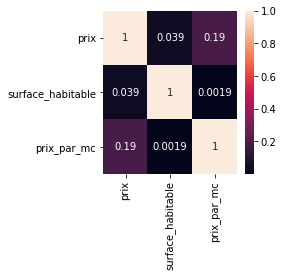

In [16]:
plt.figure(figsize=(3, 3))
sns.heatmap(data.corr().abs(),  annot=True)

In [17]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))


Column prix outliers = 9.34%
Column surface_habitable outliers = 7.76%
Column prix_par_mc outliers = 4.51%


Automatically created module for IPython interactive environment


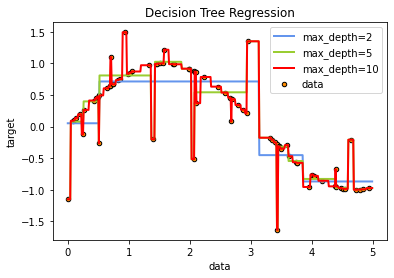

In [18]:
#TODO remove

print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="red", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [19]:
# TODO convert categorical variables to one-hot-encodings
categorical_variables = ['commune_str', 'postal_code']
commune_str_columns = list(pd.get_dummies(df['commune_str'], prefix='commune_str').columns)
df[commune_str_columns] = pd.get_dummies(df['commune_str'], prefix='commune_str')
postal_code_columns = list(pd.get_dummies(df['postal_code'], prefix='postal_code').columns)
df[postal_code_columns] = pd.get_dummies(df['postal_code'], prefix='postal_code')

In [20]:
del df['commune_str']
del df['postal_code']

In [21]:
df

,prix,surface_habitable,prix_par_mc,commune_str_aalter,commune_str_aarschot,commune_str_aartselaar,commune_str_affligem,commune_str_aiseau-presles,commune_str_alken,commune_str_alost,...,postal_code_9900,postal_code_9910,postal_code_9920,postal_code_9930,postal_code_9940,postal_code_9950,postal_code_9960,postal_code_9970,postal_code_9980,postal_code_9990
0,749000.0,250.0,2996.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,215000.0,111.0,1936.936937,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,219000.0,164.0,1335.365854,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,599000.0,378.0,1584.656085,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,345000.0,210.0,1642.857143,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614362,249500.0,180.0,1386.111111,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
614363,495000.0,294.0,1683.673469,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
614364,325000.0,160.0,2031.250000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
614365,280000.0,170.0,1647.058824,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.loc[:, df.columns != 'prix'].to_numpy()
y = df['prix'].to_numpy()

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
np.random.seed(120)

# Create a random dataset
rng = np.random.RandomState(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="red", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [25]:
df2 = pd.DataFrame({'country': ['russia', 'germany', 'australia','korea','germany']})
country_columns = list(pd.get_dummies(df2['country'], prefix='country').columns)
df2[country_columns] = pd.get_dummies(df2['country'], prefix='country')

In [26]:
df2

,country,country_australia,country_germany,country_korea,country_russia
0,russia,0,0,0,1
1,germany,0,1,0,0
2,australia,1,0,0,0
3,korea,0,0,1,0
4,germany,0,1,0,0
